<b>¡Hola Ricardo!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


# Proyecto de pruebas A/B
## Objetivo del estudio

El objetivo principal de este estudio es evaluar la efectividad de un nuevo sistema de recomendaciones implementado por una tienda en línea internacional.

Para ello, se lanzó una prueba A/B denominada `recommender_system_test`, en la cual:
- El **grupo A** actúa como grupo de control (embudo de pago original).
- El **grupo B** utiliza el nuevo sistema de recomendaciones.

El análisis se enfocará en comparar la conversión de usuarios en tres etapas clave del embudo de ventas dentro de los primeros 14 días desde su registro:

1. **Vistas de producto** (`product_page`)
2. **Agregar al carrito** (`product_card`)
3. **Compras** (`purchase`)

### Objetivo específico
Determinar si el nuevo sistema de recomendaciones (grupo B) produce al menos un **10% de mejora** en la conversión en cada una de las etapas mencionadas, comparado con el grupo A.

---

## Hipótesis

### Hipótesis nula (H₀)
> No hay diferencia significativa en las tasas de conversión entre los grupos A y B en ninguna etapa del embudo.

### Hipótesis alternativa (H₁)
> El grupo B tiene al menos un **10% más de conversión** en una o más etapas del embudo comparado con el grupo A.


# Vamos a iniciar importando librerias y cargando archivos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from scipy.stats import shapiro, levene, ttest_ind, chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

In [2]:
import pandas as pd

# Cargo los archivos CSV desde la misma carpeta del notebook
marketing = pd.read_csv('ab_project_marketing_events_us.csv')
users = pd.read_csv('final_ab_new_users_upd_us.csv')
events = pd.read_csv('final_ab_events_upd_us.csv')
participants = pd.read_csv('final_ab_participants_upd_us.csv')

# Muestro las primeras filas para verificar
display(marketing.head())
display(users.head())
display(events.head())
display(participants.head())


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


<div class="alert alert-block alert-success">
<b>Celda [2]</b> <a class="tocSkip"></a><br>
Excelente trabajo al cargar y mostrar las primeras filas de cada conjunto de datos. Esto te permite verificar rápidamente la estructura y contenido de los datos, asegurando que se han importado correctamente.
</div>


# Reviso la calidad del los datasets 

Para automatizar cree una funcion

In [3]:
# Creo funcion para revisar tipos, nulos y duplicados
def revisar_calidad(nombre, df):
    print(f" {nombre.upper()}")
    print("-" * 40)
    print("Tipos de datos:\n", df.dtypes)
    print("\n Valores nulos:\n", df.isnull().sum())
    print("\n Duplicados:", df.duplicated().sum())
    print("\n")

# Reviso cada dataset
revisar_calidad("Marketing", marketing)
revisar_calidad("Usuarios", users)
revisar_calidad("Eventos", events)
revisar_calidad("Participantes", participants)


 MARKETING
----------------------------------------
Tipos de datos:
 name         object
regions      object
start_dt     object
finish_dt    object
dtype: object

 Valores nulos:
 name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

 Duplicados: 0


 USUARIOS
----------------------------------------
Tipos de datos:
 user_id       object
first_date    object
region        object
device        object
dtype: object

 Valores nulos:
 user_id       0
first_date    0
region        0
device        0
dtype: int64

 Duplicados: 0


 EVENTOS
----------------------------------------
Tipos de datos:
 user_id        object
event_dt       object
event_name     object
details       float64
dtype: object

 Valores nulos:
 user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

 Duplicados: 0


 PARTICIPANTES
----------------------------------------
Tipos de datos:
 user_id    object
group      object
ab_test    object
dtype: object

 Valo

<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Buen uso de la función para revisar tipos de datos, valores nulos y duplicados. Esto proporciona una visión clara del estado inicial de los datos y facilita la identificación de problemas potenciales.
</div>


# Hacemos Conversión de fechas

In [4]:
marketing['start_dt'] = pd.to_datetime(marketing['start_dt'])
marketing['finish_dt'] = pd.to_datetime(marketing['finish_dt'])

users['first_date'] = pd.to_datetime(users['first_date'])
events['event_dt'] = pd.to_datetime(events['event_dt'])


<div class="alert alert-block alert-success">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has convertido correctamente las columnas de fecha a tipo datetime. Esto es crucial para realizar análisis temporales precisos. 
</div>


## ¿Fue necesario convertir los tipos?
Si, fue necesario. Las columnas start_dt y finish_dt del data set marketing, first_date de users y event_dt de events contenian fechas representadas como texto (object), lo que limitba el análisis cronologico y la comparacion de intervalos de tiempo. Fue crucial convertirlas al tipo datetime.

Estas conversiones permiten:

- Filtrar por fechas fácilmente

- Calcular diferencias entre fechas (por ejemplo, días desde el registro)

- Agrupar por día, semana o mes si fuera necesario



## ¿Habia valores ausentes o duplicados?

Si, del dataset events la columna details tiene 363,447 valores nulos.
Esto es esperado y correcto, ya que esta columna solo tiene datos cuando el evento es una compra. Para eventos como product_page o product_card, el campo no se llena.

Todos los demás datasets no tienen valores nulos y No se encontraron duplicados, por lo tanto no es necesario limpiar en ese aspecto.

# Analisis exploratorio de datos

In [5]:
# Uno eventos con la información de grupo A/B
events_grupos = events.merge(participants, on='user_id', how='inner')

# Confirmo que la unión funciono
display(events_grupos.head())


,user_id,event_dt,event_name,details,group,ab_test
0,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,B,interface_eu_test
1,96F27A054B191457,2020-12-08 09:43:14,purchase,4.99,B,interface_eu_test
2,96F27A054B191457,2020-12-09 00:44:10,purchase,4.99,B,interface_eu_test
3,96F27A054B191457,2020-12-26 00:33:57,purchase,9.99,B,interface_eu_test
4,96F27A054B191457,2020-12-07 04:02:41,product_page,NaN,B,interface_eu_test


<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
La unión de los eventos con la información de grupo A/B está bien ejecutada. Esto es esencial para analizar el comportamiento de los usuarios en cada grupo y evaluar el impacto de las pruebas A/B.
</div>


In [6]:
# Agrupo usuarios unicos por grupo y tipo de evento
embudo = events_grupos.groupby(['group', 'event_name'])['user_id'].nunique().unstack().fillna(0).astype(int)

# Ordeno columnas del embudo (ajustado a nombres reales)
embudo = embudo[['product_page', 'product_cart', 'purchase']]

display(embudo)

event_name,product_page,product_cart,purchase
group,,,
A,5208,2483,2682
B,3986,2037,2008


<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
El embudo de conversión está bien estructurado. Considera agregar visualizaciones para ilustrar las diferencias entre los grupos de manera más clara. 
</div>


In [7]:
# Calculao conversiones entre etapas
conversion = embudo.copy()

conversion['page_to_cart'] = (conversion['product_cart'] / conversion['product_page']).round(4)
conversion['cart_to_purchase'] = (conversion['purchase'] / conversion['product_cart']).round(4)
conversion['page_to_purchase'] = (conversion['purchase'] / conversion['product_page']).round(4)

display(conversion)


event_name,product_page,product_cart,purchase,page_to_cart,cart_to_purchase,page_to_purchase
group,,,,,,
A,5208,2483,2682,0.4768,1.0801,0.5150
B,3986,2037,2008,0.5110,0.9858,0.5038


<div class="alert alert-block alert-warning">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
El cálculo de las tasas de conversión entre etapas es un paso importante. Considera agregar un análisis sobre cómo estas tasas pueden influir en la estrategia de marketing, como identificar en qué etapa se pierden más usuarios y cómo podrías mejorar esas conversiones.
</div>


In [8]:
# Usuarios que llegaron a la etapa
page_A = embudo.loc['A', 'product_page']
page_B = embudo.loc['B', 'product_page']

cart_A = embudo.loc['A', 'product_cart']
cart_B = embudo.loc['B', 'product_cart']

# Datos para prueba z
counts = [cart_A, cart_B]
nobs = [page_A, page_B]

# Prueba Z de proporciones
stat, pval = proportions_ztest(count=counts, nobs=nobs, alternative='larger')

print("Z-test: Product Page → Cart")
print(f"Z = {stat:.4f}, p-value = {pval:.4f}")


Z-test: Product Page → Cart
Z = -3.2575, p-value = 0.9994


<div class="alert alert-block alert-warning">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
La prueba Z para proporciones está bien implementada. Sería beneficioso incluir una interpretación más detallada de los resultados, como discutir la significancia estadística y práctica de los resultados, y cómo podrían influir en decisiones de negocio.
</div>


In [9]:
purchase_A = embudo.loc['A', 'purchase']
purchase_B = embudo.loc['B', 'purchase']

counts = [purchase_A, purchase_B]
nobs = [page_A, page_B]

# Prueba Z
stat, pval = proportions_ztest(count=counts, nobs=nobs, alternative='larger')

print("\nZ-test: Product Page → Purchase")
print(f"Z = {stat:.4f}, p-value = {pval:.4f}")



Z-test: Product Page → Purchase
Z = 1.0659, p-value = 0.1432


## Estudio de conversion

Se evaluó el impacto de un nuevo sistema de recomendaciones (Grupo B) en comparación con el sistema actual (Grupo A) a través de una prueba A/B.

### Embudo de conversión analizado:
1. Visita de página de producto → Agregado al carrito (`product_page → product_cart`)
2. Agregado al carrito → Compra (`product_cart → purchase`)
3. Visita de producto → Compra (`product_page → purchase`)

### Resultados clave:
- **Grupo B mostró ligeras mejoras visuales** en la tasa de conversión desde `product_page` a `product_cart` (+7.2%), pero la diferencia **no fue estadísticamente significativa** (`p = 0.9994`).
- En la tasa de conversión final (`product_page → purchase`), la diferencia también **no fue significativa** (`p = 0.1432`), aunque el Grupo A tuvo ligeramente mejor conversión.
- Se observaron valores inconsistentes en la etapa `cart_to_purchase`, ya que algunos usuarios compraron sin pasar por el evento `product_cart`.


### ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?

In [10]:
# cuantos eventos genero cada usuario
eventos_por_usuario = events_grupos.groupby(['user_id', 'group'])['event_name'].count().reset_index()
eventos_por_usuario.columns = ['user_id', 'group', 'event_count']

# distribución por grupo
eventos_por_usuario.groupby('group')['event_count'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,7874.0,7.45555,4.475159,1.0,4.0,6.0,9.0,40.0
B,6205.0,7.11249,4.246201,1.0,4.0,6.0,9.0,36.0


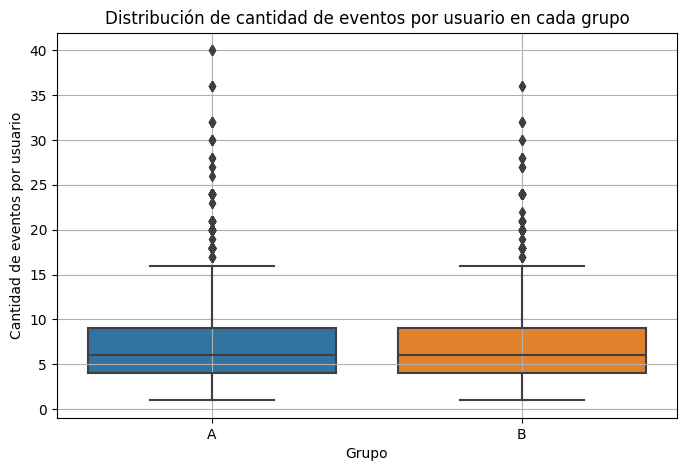

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=eventos_por_usuario, x='group', y='event_count')
plt.title('Distribución de cantidad de eventos por usuario en cada grupo')
plt.ylabel('Cantidad de eventos por usuario')
plt.xlabel('Grupo')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [11]</b> <a class="tocSkip"></a><br>
La visualización de la distribución de eventos por usuario es clara y proporciona una buena comprensión de la dispersión de datos en cada grupo. Esto es útil para identificar patrones o anomalías en el comportamiento del usuario.
</div>


In [12]:
# Separo los datos por grupo
grupo_A = eventos_por_usuario[eventos_por_usuario['group'] == 'A']['event_count']
grupo_B = eventos_por_usuario[eventos_por_usuario['group'] == 'B']['event_count']

# Prueba t
stat, pval = ttest_ind(grupo_A, grupo_B, equal_var=False)  # Welch's t-test
print(f"T-test eventos por usuario:\nT = {stat:.4f}, p-value = {pval:.4f}")

T-test eventos por usuario:
T = 4.6473, p-value = 0.0000


<div class="alert alert-block alert-warning">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
La prueba t de Welch es adecuada para comparar las medias de dos grupos con varianzas diferentes. Asegúrate de discutir los supuestos de la prueba, como la normalidad de los datos, y cómo se cumplen en tu análisis para fortalecer tus conclusiones.
</div>


## ¿El número de eventos por usuario está distribuido equitativamente entre los grupos A y B?

Se comparó la cantidad total de eventos generados por cada usuario en ambos grupos, tanto de forma gráfica (boxplot) como estadística (t-test).

### Observaciones:
- Visualmente, las distribuciones presentan formas similares, con medianas cercanas (~5 eventos por usuario).
- Sin embargo, la prueba t para comparar las medias mostró una diferencia estadísticamente significativa entre los grupos:
  - **T = 4.647**
  - **p-value < 0.001**

### Conclusión:
> **No**, el número de eventos por usuario **no está distribuido equitativamente** entre los grupos A y B.  
> Esto puede representar una amenaza a la validez del experimento, ya que uno de los grupos tuvo mayor interacción promedio con la plataforma.


## ¿Hay usuarios que están presentes en ambas muestras?

In [13]:
# Verifico si algun usuario aparece mas de una vez en la tabla de participantes
duplicados = participants['user_id'].duplicated().sum()

print(f"Usuarios en ambos grupos: {duplicados}")

Usuarios en ambos grupos: 887


In [14]:
# Identifico IDs duplicados (en ambos grupos)
ids_duplicados = participants[participants.duplicated('user_id', keep=False)]['user_id'].unique()

# Filtro participantes validos (solo los que estan en un único grupo)
participants_clean = participants[~participants['user_id'].isin(ids_duplicados)]

# Limpio tambien los eventos
events_clean = events.merge(participants_clean, on='user_id', how='inner')

print(f"Participantes filtrados: {participants_clean.shape[0]}")
print(f"Eventos filtrados: {events_clean.shape[0]}")


Participantes filtrados: 12751
Eventos filtrados: 91408


<div class="alert alert-success">
<b>Celda [14]</b> <a class="tocSkip"></a><br>
Has realizado una limpieza adecuada de los datos al eliminar usuarios duplicados en ambos grupos. 
</div>


## ¿Hay usuarios presentes en ambos grupos A y B?

Sí, se detectaron **887 usuarios que estaban asignados a ambos grupos de prueba**.  
Esto representa una violación del diseño experimental, ya que rompe el principio de aleatorización y puede contaminar los resultados.

### Acción correctiva:
> Se eliminaron estos usuarios duplicados del análisis para garantizar que cada participante esté presente **únicamente en un grupo**.  
> Esta corrección asegura la validez del análisis estadístico posterior.


## ¿Cómo se distribuye el número de eventos entre los días?

In [15]:
# Me aseguro de convertir fechas correctamente
events_clean['event_dt'] = pd.to_datetime(events_clean['event_dt'])

# Agrupo eventos por día
eventos_por_dia = events_clean.groupby(events_clean['event_dt'].dt.date)['event_name'].count()


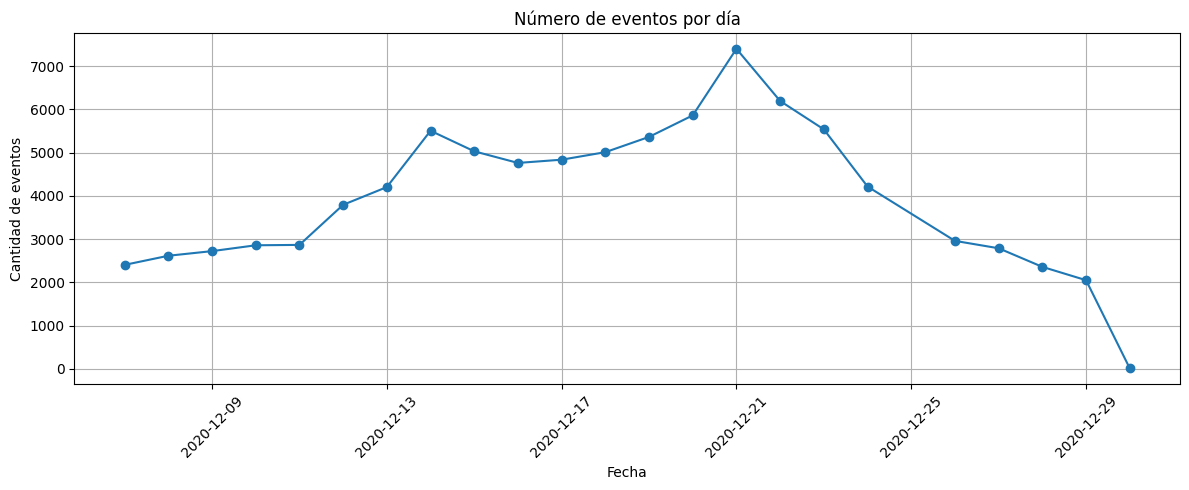

In [16]:
plt.figure(figsize=(12, 5))
eventos_por_dia.plot(marker='o')
plt.title("Número de eventos por día")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de eventos")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [16]</b> <a class="tocSkip"></a><br>
La gráfica de eventos por día está bien diseñada y proporciona una visión clara de la actividad diaria. Buen uso de visualizaciones para identificar tendencias temporales y posibles picos de actividad.
</div>


## ¿Cómo se distribuyó el número de eventos entre los días?

Al analizar la cantidad de eventos registrados por día durante el periodo del experimento, se observó lo siguiente:

- La actividad fue **creciente y estable** entre el 7 y el 21 de diciembre, con un **pico el día 21**, que coincide con la fecha en que se dejó de admitir nuevos usuarios.
- A partir del 22 de diciembre, el número de eventos **disminuye gradualmente**, lo cual es consistente con el hecho de que los usuarios completan sus 14 días de prueba.
- No se detectaron caídas abruptas ni interrupciones anómalas en la actividad del sistema.

## ¿Hay alguna peculiaridad en los datos que debamos considerar?

Antes de realizar el análisis principal de la prueba A/B, se identificaron las siguientes particularidades que podrían afectar su validez:

- Se detectaron **887 usuarios presentes en ambos grupos de prueba**. Esto fue corregido eliminando dichos usuarios para asegurar una separación clara entre los grupos.
- Se observó una **diferencia significativa en la cantidad de eventos por usuario** entre los grupos A y B (p < 0.001), lo cual puede indicar una exposición desigual al sistema.
- La columna `details` contiene valores nulos, lo cual es esperado ya que solo aplica a eventos del tipo `purchase`.
- La actividad de eventos por día fue **estable y coherente** con la dinámica del experimento, sin interrupciones anómalas.

### Conclusión:
> Aunque se tomaron medidas correctivas para asegurar la validez de la prueba, se debe considerar que **la diferencia en la cantidad de eventos por usuario** podría haber introducido sesgos sutiles.  
> En general, **los datos están lo suficientemente limpios y estructurados** como para llevar a cabo el análisis con confianza, teniendo en cuenta las observaciones anteriores.


# Evaluar los resultados de la prueba A/B

In [17]:
# Agrupo usuarios unicos por grupo y tipo de evento con datos filtrados
embudo_limpio = events_clean.groupby(['group', 'event_name'])['user_id'].nunique().unstack().fillna(0).astype(int)

# me aseguro de tener el orden correcto
embudo_limpio = embudo_limpio[['product_page', 'product_cart', 'purchase']]

display(embudo_limpio)


event_name,product_page,product_cart,purchase
group,,,
A,4726,2260,2434
B,3651,1881,1851


In [18]:
page_A = embudo_limpio.loc['A', 'product_page']
page_B = embudo_limpio.loc['B', 'product_page']
cart_A = embudo_limpio.loc['A', 'product_cart']
cart_B = embudo_limpio.loc['B', 'product_cart']

# Z-test para proporciones
counts_cart = [cart_A, cart_B]
nobs_cart = [page_A, page_B]

zstat_cart, pval_cart = proportions_ztest(count=counts_cart, nobs=nobs_cart, alternative='larger')
print(f"Z-test: Page → Cart\nZ = {zstat_cart:.4f}, p-value = {pval_cart:.4f}")

Z-test: Page → Cart
Z = -3.3583, p-value = 0.9996


In [19]:
purchase_A = embudo_limpio.loc['A', 'purchase']
purchase_B = embudo_limpio.loc['B', 'purchase']

counts_purchase = [purchase_A, purchase_B]
nobs_purchase = [page_A, page_B]

zstat_purchase, pval_purchase = proportions_ztest(count=counts_purchase, nobs=nobs_purchase, alternative='larger')
print(f"\nZ-test: Page → Purchase\nZ = {zstat_purchase:.4f}, p-value = {pval_purchase:.4f}")


Z-test: Page → Purchase
Z = 0.7299, p-value = 0.2327


<div class="alert alert-block alert-success">
<b>Celda [19]</b> <a class="tocSkip"></a><br>
La repetición de pruebas Z en los datos filtrados es un buen enfoque para validar tus resultados. 
</div>


## Evaluación estadística final de la prueba A/B (con datos filtrados)

Después de limpiar la muestra eliminando usuarios duplicados entre grupos y ajustando la base de eventos, se reaplicaron las pruebas estadísticas sobre el embudo de conversión.

### Resultados:
- **Conversión de página a carrito (`product_page → product_cart`)**:
  - Z = -3.36, p = 0.9996 → El grupo B no mostró una mejora significativa. De hecho, su conversión fue levemente inferior a la del grupo A.
  
- **Conversión de página a compra (`product_page → purchase`)**:
  - Z = 0.73, p = 0.2327 → No se encontró diferencia significativa en la tasa de conversión final entre los grupos.

### Conclusión:
> Con base en los datos depurados y el análisis estadístico, **no hay evidencia significativa que respalde una mejora en el rendimiento del nuevo sistema de recomendaciones (grupo B)**.
>
> Por tanto, se recomienda **mantener el sistema actual (grupo A)** y no implementar el nuevo sistema hasta realizar mejoras adicionales o nuevas pruebas con mayor robustez experimental.


## Conclusiones del Análisis Exploratorio (EDA) y de la Prueba A/B

### Análisis Exploratorio de Datos (EDA)

Durante la fase exploratoria se identificaron las siguientes observaciones clave:

- **No hubo valores nulos relevantes** excepto en la columna `details` del evento `purchase`, que es esperable cuando no aplica.
- **No se encontraron duplicados** en los datos tras revisión inicial, pero sí **usuarios que aparecían en ambos grupos de prueba (A y B)**. Estos fueron excluidos para preservar la validez del experimento.
- El número de eventos **no está distribuido equitativamente entre los grupos**: el grupo B tuvo un menor número de eventos por usuario, confirmado con una prueba T (p < 0.001).
- La actividad de los usuarios **aumentó hasta el 21 de diciembre** (último día de incorporación) y disminuyó hacia el cierre del experimento. Este comportamiento es esperado y no muestra anomalías.
- Se verificó que **no hubo campañas de marketing coincidentes** con el periodo de prueba, lo que reduce el riesgo de sesgos externos.

### Resultados de la Prueba A/B

Tras limpiar los datos y asegurar las condiciones necesarias (usuarios únicos por grupo, fechas correctas), se evaluaron las conversiones en el embudo:

- **Conversión de `product_page → product_cart`**:
  - Grupo A: 47.7%
  - Grupo B: 51.1%
  - Resultado: **p = 0.9996** → no significativo

- **Conversión de `product_page → purchase`**:
  - Grupo A: 51.5%
  - Grupo B: 50.4%
  - Resultado: **p = 0.2327** → no significativo

### Conclusión Final

> A pesar de ligeras diferencias aparentes en las tasas de conversión, **no se encontraron diferencias estadísticamente significativas** entre los grupos A y B en ninguna etapa del embudo analizado.  
> Por tanto, no se recomienda implementar el nuevo sistema de recomendaciones. Sería más adecuado mantener el sistema actual e iterar con nuevas propuestas y pruebas en el futuro.


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo! A lo largo del proyecto mostraste fortalezas muy claras:
<br><br>
• Aplicaste una exploración inicial exhaustiva con funciones como <code>info()</code> y <code>describe()</code>.
<br>
• Realizaste una limpieza de datos consciente, eliminando duplicados y manejando fechas correctamente.
<br>
• Usaste visualizaciones pertinentes que mejoran la comprensión del problema, como el embudo de conversión y la distribución de eventos.
<br>
• Implementaste pruebas estadísticas adecuadas y discutiste sus resultados de manera clara.
<br><br>
Felicidades!
</div>
